# CHAPTER 7
# Plotting and Visualization

<img src="matplotliblogo.png">

[Matplotlib](https://matplotlib.org/) is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

One of the key features of matplotlib that makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. 

More information at the Matplotlib web page: http://matplotlib.org/

In [2]:
import matplotlib.pyplot as plt

# This line configures matplotlib to show figures embedded in the Jupyter notebook, 
# instead of opening a new window for each figure.
%matplotlib inline

To get started using Matplotlib in a Python program, either include the symbols from the `pylab` module (the easy way):

In [3]:
import numpy as np
import pandas as pd

## 7.1 Anatomy of a "Plot"

People use "plot" to mean many different things.  Here, we'll be using a consistent terminology (mirrored by the names of the underlying classes, etc):

<img src="plotanatomy.png">

The ``Figure`` is the top-level container in this hierarchy.  It is the overall window/page that everything is drawn on.  You can have multiple independent figures and ``Figure``s can contain multiple ``Axes``. 

Most plotting ocurs on an ``Axes``.  The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it.  Usually we'll set up an Axes with a call to ``subplot`` (which places Axes on a regular grid), so in most cases, ``Axes`` and ``Subplot`` are synonymous.

Each ``Axes`` has an ``XAxis`` and a ``YAxis``.  These contain the ticks, tick locations, labels, etc.  In this tutorial, we'll mostly control ticks, tick labels, and data limits through other mechanisms, so we won't touch the individual ``Axis`` part of things all that much.  However, it's worth mentioning here to explain where the term ``Axes`` comes from.


## 7.2 MATLAB-like API

The easiest way to get started with plotting using matplotlib is often to use the MATLAB-like API provided by matplotlib. 

It is designed to be compatible with MATLAB's plotting functions, so it is easy to get started with if you are familiar with MATLAB.

To use this API from matplotlib, we need to include the symbols in the `pylab` module: 

### Example

A simple figure with MATLAB-like plotting API:

In [4]:
x = np.linspace(0, 20, 10)  #np.linspace creates sequences of evenly spaced values within a defined interval
y = x ** 2

In [5]:
np.linspace?

In [6]:
x

array([ 0.        ,  2.22222222,  4.44444444,  6.66666667,  8.88888889,
       11.11111111, 13.33333333, 15.55555556, 17.77777778, 20.        ])

In [7]:
y

array([  0.        ,   4.9382716 ,  19.75308642,  44.44444444,
        79.01234568, 123.45679012, 177.77777778, 241.97530864,
       316.04938272, 400.        ])

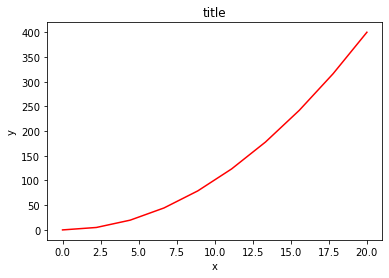

In [8]:
plt.figure()
plt.plot(x, y, 'r')  #'r' for red
plt.xlabel('x')
plt.ylabel('y')
plt.title('title')
plt.show()   #to display the plot

Most of the plotting related functions in MATLAB are covered by the `pylab` module. For example, subplot and color/symbol selection:

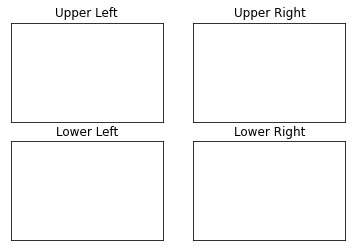

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks... to get empty box like below figures
    ax.set(xticks=[], yticks=[]);

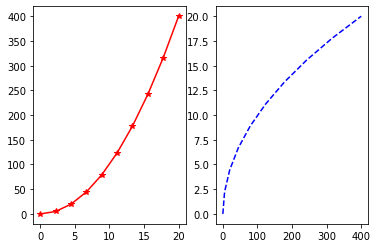

In [12]:
plt.subplot(1,2,1)
plt.plot(x, y, 'r*-')
plt.subplot(1,2,2)
plt.plot(y, x, 'b--');

The good thing about the pylab MATLAB-style API is that it is easy to get started with if you are familiar with MATLAB, and it has a minimum of coding overhead for simple plots. 

However, it is not recommended using the MATLAB compatible API for anything but the simplest figures.

Instead, it is recommended to learn and use the matplotlib's object-oriented plotting API. It is remarkably powerful. For advanced figures with subplots, insets and other components it is very nice to work with. 

## 7.3 matplotlib Object-Oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

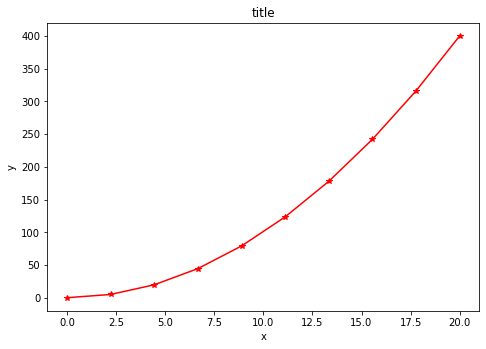

In [21]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 1.0, 1.0]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r*-')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

In [22]:
fig.add_axes?

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

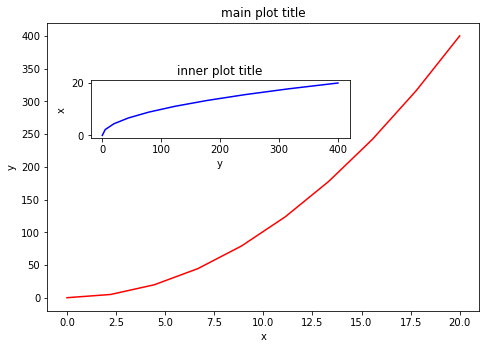

In [31]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 1.0, 1]) # main axes
axes2 = fig.add_axes([0.2, 0.7, 0.6, 0.2]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('main plot title')

# insert
axes2.plot(y, x, 'b')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('inner plot title');

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. For example is `subplots`, which can be used like this:

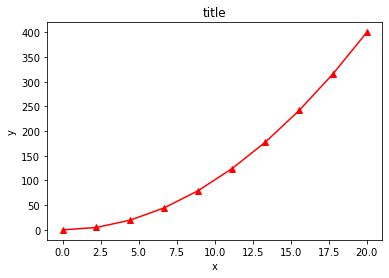

In [32]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r^-')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

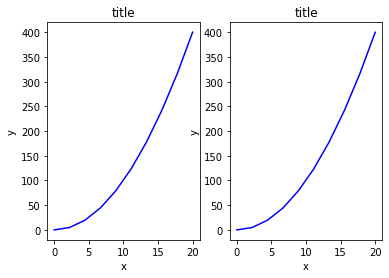

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

That was easy, but it isn't so pretty with overlapping figure axes and labels, right?

We can deal with that by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

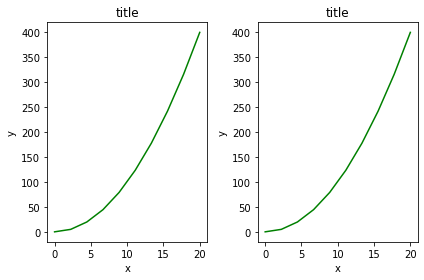

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

### 7.3.1 Figure Size, Aspect Ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do: 

In [41]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function:

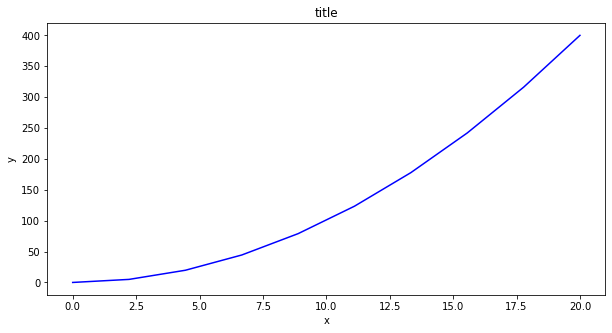

In [44]:
fig, axes = plt.subplots(figsize=(10,5))

axes.plot(x, y, 'b')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

### 7.3.2 Saving Figures

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [45]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [46]:
fig.savefig("filename1.png", dpi=200)

#### What formats are available and which ones should be used for best quality?

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. For scientific papers, it is recommended to use the PDF format whenever possible. (LaTeX documents compiled with `pdflatex` can include PDFs using the `includegraphics` command). In some cases, PGF (Progressive Graphics File) can also be good alternative.

### 7.3.3 Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [47]:
ax.set_title("title");

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [48]:
ax.set_xlabel("x")
ax.set_ylabel("y");

**Legends**

Legends for curves in a figure can be added in two ways. One method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the previously defined curves:

In [49]:
ax.legend(["curve1", "curve2", "curve3"]);

The method described above follows the MATLAB API. It is somewhat prone to errors and unflexible if curves are added to or removed from the figure (resulting in a wrongly labelled curve).

A better method is to use the `label="label text"` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend to the figure: 

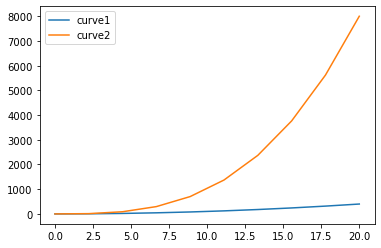

In [52]:
fig, ax = plt.subplots()
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();

The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes an optional keyword argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See http://matplotlib.org/users/legend_guide.html#legend-location for details. Some of the most common `loc` values are:

In [53]:
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available

The following figure shows how to use the figure title, axis labels and legends described above:

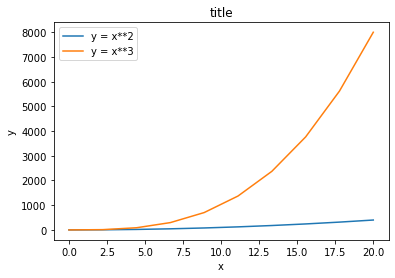

In [58]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

### 7.3.4 Formatting text: LaTeX, fontsize, font family

The figure above is functional, but it does not (yet) satisfy the criteria for a figure used in a publication. First and foremost, we need to have LaTeX formatted text, and second, we need to be able to adjust the font size to appear right in a publication. LaTeX is a document preparation system for high-quality typesetting. It is most often used for medium-to-large technical or scientific documents but it can be used for almost any form of publishing. LaTeX is not a word processor!

Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.). For example, `"$y=x^3$"`.

But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX, we frequently use the backslash in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an '`r`', like `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`:

In [59]:
s = "He said: \"Hello\" "
s

'He said: "Hello" '

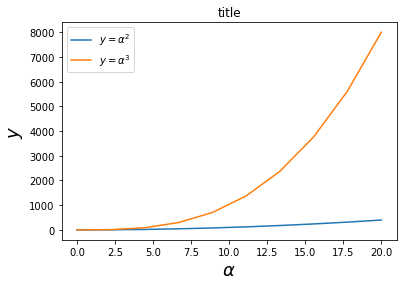

In [60]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):

In [61]:
# Update the matplotlib configuration parameters:
import matplotlib
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})  #to enlarge the font size

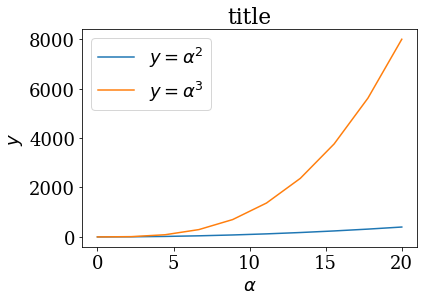

In [62]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

A good choice of global fonts are the STIX fonts: 

In [63]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

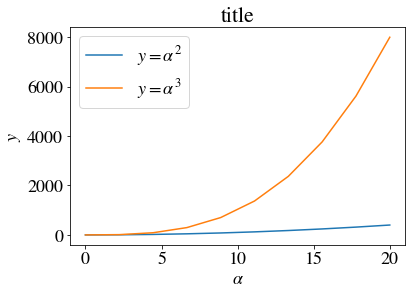

In [64]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

### 7.3.5 Setting colors, linewidths, linetypes

### Colors

This is, perhaps, the most important piece of vocabulary in matplotlib. Given that matplotlib is a plotting library, colors are associated with everything that is plotted in your figures. Matplotlib supports a [very robust language](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors) for specifying colors that should be familiar to a wide variety of users.

#### Colornames
First, colors can be given as strings. For very basic colors, you can even get away with just a single letter:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

Other colornames that are allowed are the HTML/CSS colornames such as "burlywood" and "chartreuse" are valid. See the [full list](https://matplotlib.org/examples/color/named_colors.html) of the 147 colornames. For the British speaking, we allow "grey" where-ever "gray" appears in that list of colornames. All of these colornames are case-insensitive.


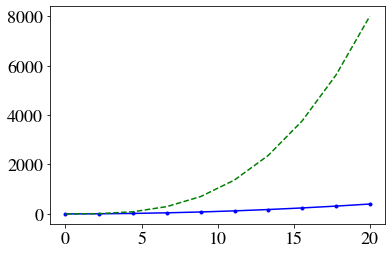

In [65]:
# MATLAB style line color and style 
fig, ax = plt.subplots()

ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments:

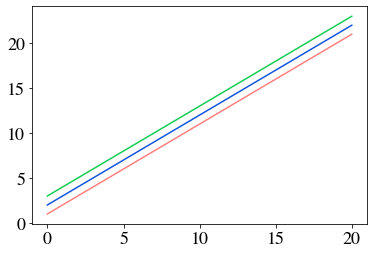

In [70]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red (the smaller the value, the lighter the color)
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

### Line and Marker Styles

Line styles are about as commonly used as colors. There are a few predefined linestyles available to use. Note that there are some advanced techniques to specify some custom line styles. [Here](http://matplotlib.org/1.3.0/examples/lines_bars_and_markers/line_demo_dash_control.html) is an example of a custom dash pattern.

linestyle          | description
-------------------|------------------------------
'-'                | solid
'--'               | dashed
'-.'               | dashdot
':'                | dotted
'None'             | draw nothing
' '                | draw nothing
''                 | draw nothing

Also, don't mix up ".-" (line with dot markers) and "-." (dash-dot line) when using the ``plot`` function!

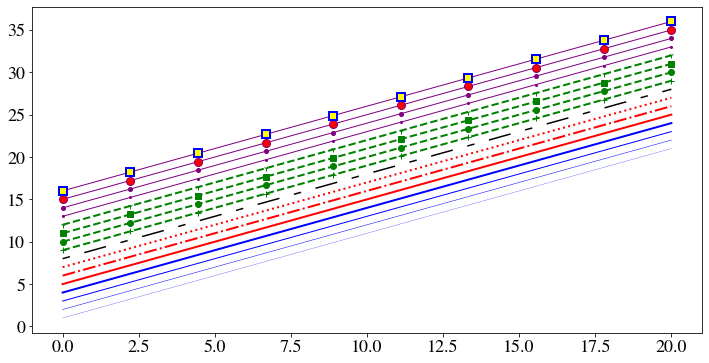

In [71]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.') #ls and linestyle are the same
ax.plot(x, x+7, color="red", lw=2, ls=':') #lw and linewidth are the same

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Markers
[Markers](http://matplotlib.org/api/markers_api.html) are commonly used in [`plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and [`scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) plots, but also show up elsewhere. There is a wide set of markers available, and custom markers can even be specified.

marker     |  description  ||marker    |  description  ||marker    |  description  ||marker    |  description  
:----------|:--------------||:---------|:--------------||:---------|:--------------||:---------|:--------------
"."        |  point        ||"+"       |  plus         ||","       |  pixel        ||"x"       |  cross
"o"        |  circle       ||"D"       |  diamond      ||"d"       |  thin_diamond ||          |
"8"        |  octagon      ||"s"       |  square       ||"p"       |  pentagon     ||"\*"      |  star
"&#124;"   |  vertical line||"\_"      | horizontal line ||"h"     |  hexagon1     ||"H"       |  hexagon2
0          |  tickleft     ||4         |  caretleft    ||"<"       | triangle_left ||"3"       |  tri_left
1          |  tickright    ||5         |  caretright   ||">"       | triangle_right||"4"       |  tri_right
2          |  tickup       ||6         |  caretup      ||"^"       | triangle_up   ||"2"       |  tri_up
3          |  tickdown     ||7         |  caretdown    ||"v"       | triangle_down ||"1"       |  tri_down
"None"     |  nothing      ||`None`    |  nothing      ||" "       |  nothing      ||""        |  nothing

### 7.3.6 Control over axis appearance

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

See the [complete method](https://matplotlib.org/api/axes_api.html) for Axes in matplotlib.


#### Plot range

The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object. By default, or with `axis('tight')`, axes ranges are getting "tightly fitted":

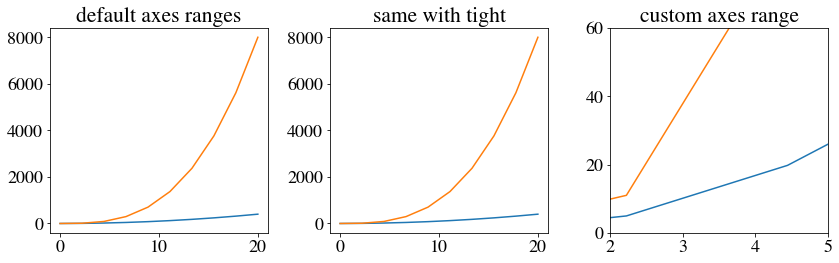

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)   #contains 2 plot in figure (x, x**2) and (x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("same with tight")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

fig.tight_layout()

#### Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

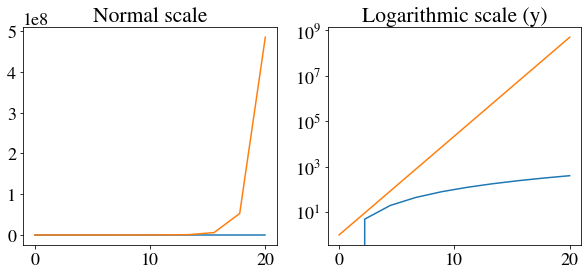

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

#### Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

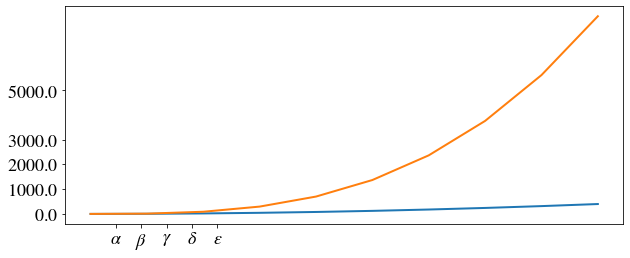

In [74]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 1000, 2000, 3000, 5000]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.

#### Scientific notation

With large numbers on axes, it is often better use scientific notation:

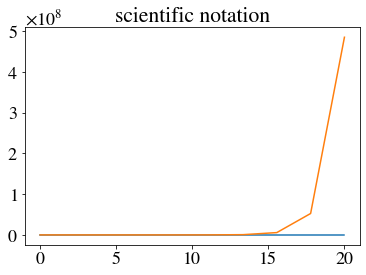

In [75]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) #how y-axis to be formatted

Text(0.5, 1.0, 'no scientific notation')

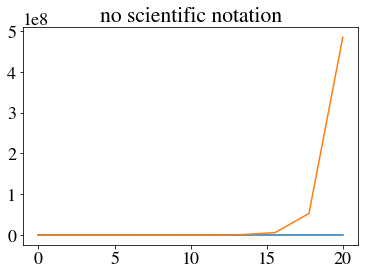

In [76]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("no scientific notation")

#### Axis number and axis label spacing

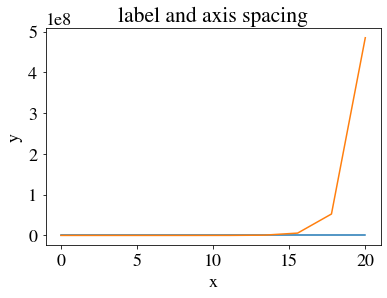

In [79]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

In [80]:
# restore defaults
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

#### Axis position adjustments

Unfortunately, when saving figures the labels are sometimes clipped, and it can be necessary to adjust the positions of axes a little bit. This can be done using `subplots_adjust`:

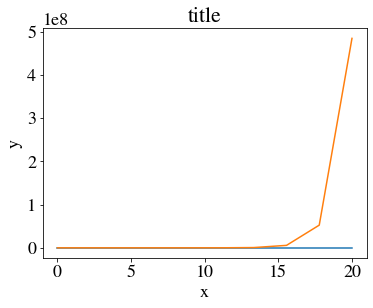

In [83]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9)  #to adjust axes position

In [84]:
fig.subplots_adjust?

#### Axis Grid

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

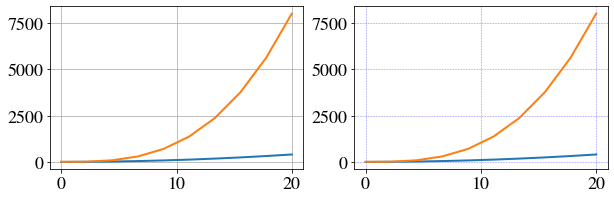

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

#### Axis spines

We can also change the properties of axis spines:

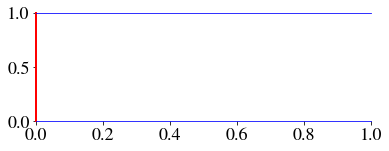

In [88]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

#### Twin axes

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

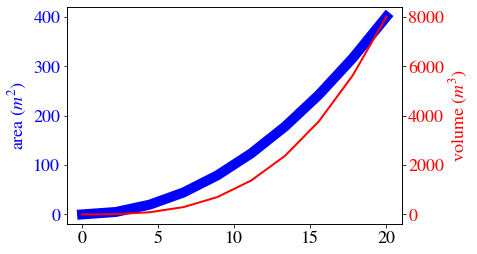

In [89]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, linewidth=10, color="blue") 
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")

ax2 = ax1.twinx()
ax2.plot(x, x**3, linewidth=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

#### Axes where x and y is zero

Spines are the lines connecting the axis tick marks and noting the
   boundaries of the data area. They can be placed at arbitrary
   positions.

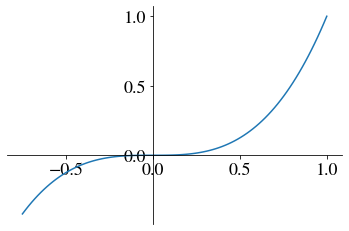

In [90]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

#ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

In [ ]:
#to get help
help(ax.spines['left'])

## Exercise 1
 
Given a simple dataset below:

Time (decade): 0, 1, 2, 3, 4, 5, 6.<br />
CO2 concentration (ppm): 250, 265, 272, 260, 300, 320, 389

* Create a line graph of CO2 versus time. View the plot.
* Re-draw the graph with a blue dashed line.
* Add a title and axis titles to the plot.

In [ ]:
# Your code here



## Exercise 2

Continuing with the above data plot, add a second line to graph above from the data given below:

Temp (°c): 14.1, 15.5, 16.3, 18.1, 17.3, 19.1, 20.2

* Save the output (using Python code) to a PDF file.

Hint: have a look at: https://matplotlib.org/examples/api/two_scales.html

In [ ]:
# Your code here


### Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

In [ ]:
n = np.array([0,1,2,3,4,5])

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(n, n**2, n**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

#### Bar Plots

The `plot.bar()` and `plot.barh()` make vertical and horizontal bar plots, respectively. In this case, the Series or DataFrame index will be used as the x (bar) or y (barh) ticks.

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10,10))
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='r', alpha=0.7) 
data.plot.barh(ax=axes[1], color='b', alpha=0.7)

With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value.

In [ ]:
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df 

In [ ]:
df.plot.bar()

We create stacked bar plots from a DataFrame by passing stacked=True, resulting in the value in each row being stacked together.

In [ ]:
df.plot.barh(stacked=True)

In [ ]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, 0.6, 0.6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3);

In [ ]:
fig.add_axes?

In [ ]:
# A histogram
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

### 7.3.7 Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

In [ ]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### 7.3.8 Figures with multiple subplots and insets

Axes can be added to a matplotlib Figure canvas manually using `fig.add_axes` or using a sub-figure layout manager such as `subplots`, `subplot2grid`, or `gridspec`:

#### subplots

In [ ]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

In [ ]:
fig = plt.figure()
#top grid
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)  #colspan = 3 means taking 3 columns
#middle horizontal rectangle
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
#rigth vertical rectangle
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)

ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [ ]:
import matplotlib.gridspec as gridspec

In [ ]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### add_axes

Manually adding axes with `add_axes` is useful for adding insets to figures:

In [ ]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

## Plotting Preparation

Function          | Description                                                                                
:-----------------|:----------------------------------------------------------
`autoscale`       | Autoscale the axis view to the data (toggle).
`axes`            | Add an axes to the figure.                                                                 
`axis`            | Convenience method to get or set axis properties.
`cla`             | Clear the current axes.                                                                    
`clf`             | Clear the current figure.                                                                  
`clim`            | Set the color limits of the current image.                                                 
`delaxes`         | Remove an axes from the current figure.                                                    
`locator_params`  | Control behavior of tick locators.                                                         
`margins`         | Set or retrieve autoscaling margins.
`figure`          | Creates a new figure.                                                                      
`gca`             | Return the current axis instance.                                                          
`gcf`             | Return a reference to the current figure.                                                  
`gci`             | Get the current colorable artist.                                                          
`hold`            | Set the hold state.                                                                        
`ioff`            | Turn interactive mode off.                                                                 
`ion`             | Turn interactive mode on.                                                                  
`ishold`          | Return the hold status of the current axes.                                                
`isinteractive`   | Return status of interactive mode.                                                         
`rc`              | Set the current rc params.                                                                 
`rc_context`      | Return a context manager for managing rc settings.                                         
`rcdefaults`      | Restore the default rc params.                                                             
`savefig`         | Save the current figure.                                                                   
`sca`             | Set the current Axes instance.                                                     
`sci`             | Set the current image.                                                                     
`set_cmap`        | Set the default colormap
`setp`            | Set a property on an artist object
`show`            | Display a figure
`subplot`         | Return a subplot axes positioned by the given grid definition.                             
`subplot2grid`    | Create a subplot in a grid.                                                                
`subplot_tool`    | Launch a subplot tool window for a figure.                                                 
`subplots`        | Create a figure with a set of subplots already made.                                       
`subplots_adjust` | Tune the subplot layout.                                                                   
`switch_backend`  | Switch the default backend.                                                                
`tick_params`     | Change the appearance of ticks and tick labels.                                            
`ticklabel_format`| Change the ScalarFormatter used by default for linear axes.           
`tight_layout`    | Automatically adjust subplot parameters to give specified padding.                         
`xkcd`            | Turns on [XKCD](http://xkcd.com/) sketch-style drawing mode.                             
`xlabel`          | Set the *x* axis label of the current axis.                                                
`xlim`            | Get or set the *x* limits of the current axes.                                             
`xscale`          | Set the scaling of the *x*-axis.                                                           
`xticks`          | Get or set the *x*-limits of the current tick locations and labels.                        
`ylabel`          | Set the *y* axis label of the current axis.                                                
`ylim`            | Get or set the *y*-limits of the current axes.                                             
`yscale`          | Set the scaling of the *y*-axis.                                                           
`yticks`          | Get or set the *y*-limits of the current tick locations and labels.                        

## Plotting Functions

Function          | Description
:-----------------|:--------------------------------------------
`acorr`           | Plot the autocorrelation of *x*
`bar`             | Make a bar plot
`barbs`           | Plot a 2-D field of barbs
`barh`            | Make a horizontal bar plot
`boxplot`         | Make a box and whisker plot
`broken_barh`     | Plot horizontal bars
`cohere`          | Plot the coherence between *x* and *y*
`contour`         | Plot contours
`contourf`        | Plot filled contours
`csd`             | Plot cross-spectral density
`errorbar`        | Plot an errorbar graph
`eventplot`       | Plot identical parallel lines at specific positions
`fill`            | Plot filled polygons
`fill_between`    | Make filled polygons between two curves
`fill_betweenx`   | Make filled polygons between two horizontal curves
`hexbin`          | Make a hexagonal binning plot
`hist`            | Plot a histogram
`hist2d`          | Make a 2D histogram plot
`imshow`          | Display an image on the axes
`loglog`          | Make a plot with log scaling on both the *x* and *y* axis
`matshow`         | Display an array as a matrix in a new figure window
`pcolor`          | Create a pseudocolor plot of a 2-D array
`pcolormesh`      | Plot a quadrilateral mesh
`pie`             | Plot a pie chart
`plot`            | Plot lines and/or markers
`plot_date`       | Plot with data with dates
`polar`           | Make a polar plot
`psd`             | Plot the power spectral density
`quiver`          | Plot a 2-D field of arrows
`scatter`         | Make a scatter plot of x vs y
`semilogx`        | Make a plot with log scaling on the *x* axis 
`semilogy`        | Make a plot with log scaling on the *y* axis
`specgram`        | Plot a spectrogram
`spy`             | Plot the sparsity pattern on a 2-D array
`stackplot`       | Draws a stacked area plot
`stem`            | Create a stem plot
`step`            | Make a step plot
`streamplot`      | Draws streamlines of a vector flow
`tricontour`      | Draw contours on an unstructured triangular grid
`tricontourf`     | Draw filled contours on an unstructured triangular grid
`tripcolor`       | Create a pseudocolor plot of an unstructured triangular grid
`triplot`         | Draw a unstructured triangular grid as lines and/or markers
`xcorr`           | Plot the cross-correlation between *x* and *y*

## Plot modifiers

Function          | Description                                                                                
:-----------------|:---------------------------------------------------------------------
`annotate`        | Create an annotation: a piece of text referring to a data point
`arrow`           | Add an arrow to the axes
`axhline`         | Add a horizontal line across the axis
`axhspan`         | Add a horizontal span (rectangle) across the axis
`axvline`         | Add a vertical line across the axes
`axvspan`         | Add a vertical span (rectangle) across the axes
`box`             | Turn the axes box on or off
`clabel`          | Label a contour plot
`colorbar`        | Add a colorbar to a plot
`grid`            | Turn the axes grids on or off
`hlines`          | Plot horizontal lines
`legend`          | Place a legend on the current axes
`minorticks_off`  | Remove minor ticks from the current plot
`minorticks_on`   | Display minor ticks on the current plot
`quiverkey`       | Add a key to a quiver plot
`rgrids`          | Get or set the radial gridlines on a polar plot
`suptitle`        | Add a centered title to the figure
`table`           | Add a table to the current axes
`text`            | Add text to the axes
`title`           | Set a title of the current axes
`vlines`          | Plot vertical lines
`xlabel`          | Set the *x* axis label of the current axis
`ylabel`          | Set the *y* axis label of the current axis"

## Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.


From [University of Southampton](http://www.southampton.ac.uk/~fangohr/training/python14/notebooks/Matplotlib.html)